# IMPLEMENTATION OF 3-LAYER NEURAL NETWORK FROM SCRATCH
# BY: M.SOWMIA
# ROLL NO: MA19M020

This project is about implementing a neural network from scratch and see how it performs on a dataset.By "scratch" i mean using only numpy and matplotlib.<br><br>
First ,we try to implement a 3-layer NN with the following different options for hyper-parameters
- Number of neurons in the Hidden-layer (default=3)
- six different types of activation functions
    - ELU (exponential linear unit)
    - RELU (Rectified Linear Units)
    - LeakyReLU (a variant of ReLU)
    - Sigmoid (aka the logit fn)
    - Tanh (actually a function of sigmoid)
    - Softmax (particulary of the output layer when we do multi-class classification)
- Learning rate (incase of SD-method)
- Different optimisation methods
    - Batch-gradient descent
    - stochastic gradient descent
    - mini-batch gradient descent
    
## A 3-LAYER NN 
![title](nn.png)
## The number of neurons:
The number of neurons in the input layer is the number of features in the training dataset.The number of neurons in the hidden-layer can be chosen.Generally the greater the number of the neurons,the better will be the performance of the algorithm on the training set.The number of neurons in the output layer is chosen according to the number of classes in the label.(2 for a binary classifier and k for a label with k-classes).In each of the layers (except of the output layer)there is a additional neuron which accounts for the bias.Note that this bias term always takes the value 1.
## The feed-forward mechanism:
The mechanism is very simple.The input layer is basically a input.(A row/instance) of the dataset.<br><br>
$$\Theta^{(1)}=\text{weights of the first-layer}$$<br>
$$\Theta^{(2)}=\text{weights of the second-layer}$$<br>
For example ,if we had a nn with 5 neurons in input layer,7 in hidden layer(including the bias) and say 2 in output  layer,then our matrix $\Theta^1$ will be a 7x5 matrix and $\Theta^2$ will be a 2x7 matrix.<br>
As a first-step we calculate<br><br>
$$a^{(1)}=X$$<br>
$$z^{(2)}=(\Theta^{(1)})a^{(1)}$$<br>
$$a^{(2)}=g(z^{(2)})\quad\text{where g is the activation function chosen)}$$<br>
$$z^{(3)}=(\Theta^{(2)})a^2$$ <br>
$$a^{(3)}=h(z^{(3)})\quad\text{where h is the softmax activation function)}$$<br>
Finally we get ,$\hat y=h(z^{(3)})$ from the output layer,which tells us the which of the k-classes the instance belongs to.
## COMPUTING DELTA FOR NEURONS:
Once we have predicted the output for a instance using feed-forward mechanism,we can claculate the error by 
<br><br>
$$\delta^{(3)}=y-\hat y$$.We use this to find the errors made by the neurons in second layer given by
<br><br>
$$\delta^{(2)}=((\Theta^{(2)})^T\delta^{(3)}).g'(z^{(2)})$$<br>
When the activation function is sigmoid ,we have $$g'(z)=g(z)(1-g(z))$$<br>
we can write derivative as
$$g'(z^{(2)})=(a^{(2)})^T(1-a^{(2)})$$<br>
In general if the NN consists of L layers,then we first claculate<br>
$$\delta^{(L)}=y-\hat y$$<br>
Then for i=L-1,L-2....2,we caclualte error as follows:<br><br>
$$\delta^{(i)}=((\Theta^{(i)})^T\delta^{(i+1)}).g'(z^{(i)})$$<br><br>

## THE COST-FUNCTION:
There are many possible cost functions,however we will try to restrict our selves to the cost fuunction of logistic regression.For neural networks, it is going to be slightly more complicated:<br><br>
$$J(\Theta)=-\frac{1}{m}\sum_{i=1}^m\sum_{j=1}^n\Big[y_j^{(i)}log(h(x^{(i)})_j+(1-y_j^{(i)})(1-log(h(x^{(i)})_j)\Big]$$where m is number of training examples and n is number of classes.Now ,let us define<br><br>
$$\Delta_{ij}^{(l)}=\frac{\partial J({\Theta})}{\partial \Theta_{ij}^{(l)}}$$<br><br>
After claculating $\delta^{(l)}$ for all layers(except first),we would be having
\begin{equation}
\Delta^{(l)}=\frac{\partial J({\Theta})}{\partial \Theta^{(l)}}=
\begin{bmatrix}
\frac{\partial J({\Theta})}{\partial \Theta_{10}^{(l)}} & \frac{\partial J({\Theta})}{\partial \Theta_{11}^{(l)}} & ....\\
\frac{\partial J({\Theta})}{\partial \Theta_{20}^{(l)}} & \frac{\partial J({\Theta})}{\partial \Theta_{21}^{(l)}} & ....\\
\vdots\\
\vdots\\
\frac{\partial J({\Theta})}{\partial \Theta_{n_{l+1}0}^{(l)}} & \frac{\partial J({\Theta})}{\partial \Theta_{n_{l+1}1}^{(l)}} & ....
\end{bmatrix}
\end{equation}<br><br>
Where $\Delta^{(l)}=\Delta^{(l)}+\delta^{(l+1)}(a^{(l)})^T$<br>

## THE BACK-PROPOGATION ALGORITHM w/o REGULARISATION:
The pseudo code for back-prop works as follwos:<br><br>
initialise random weights $\Theta_1,\Theta_2..\Theta_L$<br>
initiailse $\Delta_{ij}^{(l)}=0 \quad\forall i,j,l$<br><br>
while($cost(\Theta)<\epsilon)||noiter<threshold)$):<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ for each observation i in the training set:<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Fwd propogate and compute $h(i)=a_i^{(L)}$<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Compute $\delta^{(L)}=\hat y_i-a_i^{(L)}$<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Compute $\delta^{(i)}=((\Theta^{(i)})^T\delta^{(i+1)}).g'(z^{(i)})\quad \forall i=2,3...L-1$<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Compute partial derivatives of cost fucntion given by $\Delta^{(l)} =\Delta^{(l)}+\delta^{(l+1)}(a^{(l)})^T \quad \forall l=1,2..L-1$<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ Set $\Delta_{ij}^{(l)}=\frac{1}{m}[\Delta_{ij}^{(l)}]\quad\forall i,j,l$<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ Feed the partial derivatives $\Delta_{ij}^{(l)}$ to gradient descent (or any optimization algorithm) and get the updated weights<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ Update $\Theta_1,\Theta_2..\Theta_L$<br><br>

## THE BACK-PROPOGATION ALGORITHM with REGULARISATION:
The pseudo code for back-prop works as follwos:<br><br>
initialise random weights $\Theta_1,\Theta_2..\Theta_L$<br>
initiailse $\Delta_{ij}^{(l)}=0 \quad\forall i,j,l$<br><br>
while($cost(\Theta)<\epsilon)||noiter<threshold)$):<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ for each observation i in the training set:<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Fwd propogate and compute $h(i)=a_i^{(L)}$<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Compute $\delta^{(L)}=\hat y_i-a_i^{(L)}$<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Compute $\delta^{(i)}=((\Theta^{(i)})^T\delta^{(i+1)}).g'(z^{(i)})\quad \forall i=2,3...L-1$<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Compute partial derivatives of cost fucntion given by $\Delta^{(l)} =\Delta^{(l)}+\delta^{(l+1)}(a^{(l)})^T \quad \forall l=1,2..L-1$<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$Set $\Delta_{ij}^{(l)}=\frac{1}{m}[\Delta_{ij}^{(l)}]+\lambda\Theta_{ij}^{(l)}\quad\forall i,j\neq 0,l$  and $\Delta_{i0}^{(l)}=\frac{1}{m}[\Delta_{i0}^{(l)}]\quad\forall i,l$<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ Feed the partial derivatives $\Delta_{ij}^{(l)}$ to gradient descent (or any optimization algorithm) and get the updated weights<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ Update $\Theta_1,\Theta_2..\Theta_L$<br><br>



## Importing datasets 
Bleow we generated a set of points from dataset make_moons.It has two classes as denoted by pink and violet dots.Our aim is to find a non-linear decision boundary that fits the dataset and preferably works good for non-seen dataset

In [5]:
#importing all required datasets
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import sklearn.datasets
import random
import math

In [28]:
class ThreeLayerNN:
    
    #class objects initilization
    #NN_config =[a,b,c] a-#no Neurons in input layer,b=# of neurons in hidden layer, c=#of neurons in output layer
    #Theta1~bxa,Theta2~cxb,b1~bx1,b2~cx1
    
    def __init__(self,NN_config,Theta1,Theta2,b1,b2,optimization_method="BGD",lr=0.1,reg_param=0,cost_func="log-loss",epsilon=0.01,noiter=10,activation="sigmoid",alpha=0.01):
        
        #intilising the configuartion of NN
        self.input_layer=NN_config[0]
        self.hidden_layer=NN_config[1]
        self.output_layer=NN_config[2]
        
        #initilising weights and bias
        self.Theta1=Theta1
        self.Theta2=Theta2
        self.b1=b1
        self.b2=b2
        self.unrolled_weights=np.concatenate((np.ravel(self.Theta1),np.ravel(self.Theta2)),axis=0)
        
        #intialising deltas for weights and bias
        self.delta_Theta1 = np.zeros(self.Theta1.shape)
        self.delta_Theta2 = np.zeros(self.Theta2.shape)
        self.delta_b1 = np.zeros(self.b1.shape)
        self.delta_b2 = np.zeros(self.b2.shape)
         
        #initilising optimization algorithm (SGD,BGD,MBGD)
        self.optimization_method=optimization_method
        #intialising learning rate(SGD,BGD,MBGD)
        self.lr=lr
        #initilaising regularisation parameter
        self.reg_param=reg_param
        #intialising the type of cost function("log-loss","MSE")
        self.cost_func=cost_func
        #intilising the max number of iterations and threshold (whihever occurs first)to stop optimization algortihms
        self.noiter=noiter
        self.epsilon=epsilon
        #intilising the activation of hidden-layer("tanh","sigmoid","RELU","LeakyRELU","ELU","Softmax")
        self.activation=activation
        #initialsing alpha(used in leaky RELU)
        self.alpha=alpha
        
    #Defining a function to calculate the cost_function
    def cost(self,y_actual,y_pred,Theta=None):
        if Theta is None:
            Theta = self.unrolled_weights
        if(self.cost_func=="log-loss"):
            pad_term=10e-5 #adding this terms to avoid accidently calculating log(0)
            m=len(y_actual)
            return ((-1/m*(np.sum(y_actual*np.log(y_pred.clip(pad_term)))))+(self.reg_param/(2*m))*(np.sum(Theta**2)))
        elif(self.cost_func=="MSE"):
            loss = (1/2)*(np.square(y-y_hat).mean(axis = 0))
            return (np.sum(loss, axis = 0)+(self.reg_param/(2*m))*(np.sum(Theta**2)))
        
    
    #defining a funciton to calculate the derivative of the cost function
    #NOTE:we generrally use back-prop to calculate derivatives,howver for gradient checking ,we might require this function
    #Please use this function ony for cross-checking,don't put it in the loop,it will take centuries to run!!
    def gradient_checking(self,y_actual,y_pred):
        epsilon=0.01
        self.unrolled_weights=np.concatenate((np.ravel(self.Theta1),np.ravel(self.Theta2)),axis=0)
        derivatives=[]
        for i in range(len(self.unrolled_weights)):
            fwd_diff=self.unrolled_weights
            fwd_diff[i]=fwd_diff[i]+epsilon
            bwd_diff=self.unrolled_weights
            bwd_diff[i]=bwd_diff[i]-epsilon
            derivatives.append((self.cost(y_actual,y_pred,fwd_diff)-self.cost(y_actual,y_pred,bwd_diff))/(2*epsilon))
        return derivatives
    
    
    #defining a function to give activations for the hidden layer..Z1=Theta1xX+b1 and Z2=Theta2xa2+b2
    def activation_func(self,z):
        if(self.activation=="sigmoid"):
            return 1/(1+np.exp(-z))
        elif(self.activation=="tanh"):
            return ((2/(1+np.exp(-2*z)))-1)
        elif(self.activation=="RELU"):
            return z.clip(min=0)
        elif(self.activation=="LeakyRELU"):
            return (self.alpha*z.clip(max=0))+z.clip(min=0)
        elif(self.activation=="ELU"):
            return ((self.alpha*np.exp(z.clip(max=0)-1))+z.clip(min=0))
        
    #defining function for derivative of activation functions
    #NOTE:In below code a=g(z) ie derivatives are defined interms of function values for all activations 
    def activation_derivative(self,a):
        if(self.activation=="sigmoid"):
            return np.multiply(a, (1.0 - a))
        elif(self.activation=="tanh"):
            return 1-(a**2)
        elif(self.activation=="RELU"):
            return (np.sign(a)+1)/2
        elif(self.activation=="LeakyRELU"):
            return np.sign(a).clip(self.alpha)
        elif(self.activation=="ELU"):
            return ((self.alpha*np.exp(a.clip(max=0)))-(self.alpha*np.sign(a.clip(min=0)))+a.clip(min=0))
        
        
    #defining the soft-max function for the output layer h(x)
    #NOTE:for the below function z=Theta2xa2+b2
    def softmax(self,z):
        scores=np.exp(z)
        total_score=np.sum(np.exp(z))
        return scores/total_score
    
    
    #Defining functions for FORWARD PROPOGATION
    def forward_propogate(self,x):
        self.a0 = x.copy()
        self.z1 = self.Theta1.dot(self.a0) + self.b1
        self.a1 = self.activation_func(self.z1)
        self.z2 = self.Theta2.dot(self.a1) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2
    
    #Defining function for BACKWARD PROPOGATION(to claculate the derivative of cost function with respect to weights)
    def backward_propogate(self,y,y_hat):
        #calculate delta3,note:y_hat is the h(x) value
        y_actual=np.zeroes(len(y))
        y_actual[y]=1
        self.delta3 = np.multiply(-y_actual+y_hat,self.activation_derivative(self.a2))
        #therefore calculate delta2 
        self.delta2 = np.multiply(self.Theta2.T.dot(self.delta3),self.activation_derivative(self.a1))
        #We now calculate derivatives wrt the weights and bias of the cost 
        self.delta_Theta1 = np.outer(self.delta2,self.a0)
        self.delta_Theta2 = np.outer(slef.delta3,self.a1)
        self.delta_b1 = self.delta2
        self.delta_b2 = self.delta3
        return self.delta_Theta1,self.delta_Theta2,self.delta_b1,self.delta_b2
        
        
    #functions for predicting ,GD
    def predict(self,x):
        y_pred=self.forward_propogate(x)
        return np.argmax(y_pred)
    
    #Defining function for plotting the decision boundary,please use this function only once at the last,it is very slow
    def plot_decision_boundary(self,X, y):
        # Set min and max values and give it some padding
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        h = 0.1
        # Generate a grid of points with distance h between them
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        # Predict the function value for the whole gid
        grid_pts=np.c_[xx.ravel(), yy.ravel()]
        Z=[]
        for x in grid_pts:
            Z.append(self.predict(x))
        Z=np.array(Z)
        Z = Z.reshape(xx.shape)
        # Plot the contour and training examples
        plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
        

    
        
    def Train_Test_compare(self,x_train,y_train,x_test,y_test):
        #I am just implementing the delta rule as discussed in the coursera Andrew Ng course
        #take cases for BGD,MBGD,SGD and accordingly
        if(self.optimization_method=="BGD"):
            self.train_error=[]
            self.test_error=[]
            epochs=0
            while(epochs<self.noiter):
                epochs+=1
                #calculating the test MSE
                y_test_pred=[]
                y_train_pred=[]
                del_Theta1=np.zeros(self.delta_Theta1.shape)
                del_Theta2=np.zeros(self.delta_Theta2.shape)
                del_b1=np.zeros(self.delta_b1.shape)
                del_b2=np.zeros(self.delta_b2.shape)
                for i in range(len(x_test)):
                    y_test_pred.append(self.forward_propogate(x_test[i]))
                y_test_pred=np.array(y_test_pred)
                self.test_error.append(self.cost(y_test,y_test_pred))
                #training with full batch
                for i in range(len(x_train)):
                    y_pred=self.forward_propogate(x_train[i])
                    y_train_pred.append(self.forward_propogate(y_pred))
                    #Finding all deltas and storing them
                    a,b,c,d=self.backward_propogate(y_train,y_pred)
                    del_Theta1 += a
                    del_Theta2 + b
                    del_b1 += c
                    del_b2 += d
                #finding average of deltas
                self.delta_Theta1 = ((del_Theta1)/len(x_train))+self.reg_param*self.Theta1 
                self.delta_Theta2 = (del_Theta2/len(x_train))+self.reg_param*self.Theta2
                self.delta_b1 = (del_b1)/len(x_train)
                self.delta_b2 = (del_b2)/len(x_train)
                #updating weights
                self.Theta1 -= self.lr*self.delta_Theta1
                self.Theta2 -= self.lr*self.delta_Theta2
                self.b1 -= self.lr*self.delta_b1
                self.b2 -= self.lr*self.delta_b2
                self.unrolled_weights = np.concatenate((np.ravel(self.Theta1),np.ravel(self.Theta2)),axis=0)
                self.train_error.append(self.cost(y_train,y_train_pred))
                #If no significant change in test MSE  ...we stop
                if(epochs>5):
                    if(np.abs(self.test_error(epochs-1)-self.test_error(epochs-2))<self.epsilon):
                        print("The number of iterations required for convergence is:", epochs)
                        break
            #Now plot the decision boundary with optimum values of weights and bias found
            self.plot_decision_boundary(x_train,y_train)
                    
                    
                    
                    
            
    
        
        

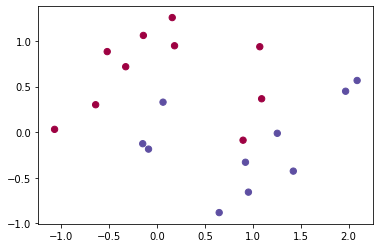

In [11]:
#Creating my own dataset to check the working of the algorithm
np.random.seed(0)
X, y = sklearn.datasets.make_moons(20, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [29]:
NN_config=[2,3,2]
np.random.seed(10)
W1 = np.random.rand(3,2)
W2 = np.random.rand(2,3)
b1 = np.random.rand(3,1)
b2 = np.random.rand(2,1)
model=ThreeLayerNN(NN_config,W1,W2,b1,b2)

In [30]:
model.Train_Test_compare(X[:10,:],y[:10],X[10:,:],y[10:])

ValueError: operands could not be broadcast together with shapes (10,) (10,2,3) 